In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from tqdm.notebook import tqdm
from warnings import filterwarnings
from scipy.optimize import differential_evolution

%matplotlib inline

In [2]:
filterwarnings('ignore')

# Задание
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.
Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

In [4]:
bounds = [(-10, 10), (-10, 10)]

In [5]:
param_grid = {'strategy': ['best1bin', 'best1exp', 'rand1exp',
                           'randtobest1exp', 'currenttobest1exp',
                           'best2exp', 'rand2exp', 'randtobest1bin',
                           'currenttobest1bin', 'best2bin', 'rand2bin',
                           'rand1bin'],
              'popsize': np.arange(1, 31),
              'tol': [0.1, 0.01, 0.001, 0.0001],
              'mutation': np.arange(0.1, 1.0, 0.1),
              'recombination': np.arange(0.1, 1.0, 0.1),
              'updating': ['immediate', 'deferred']}

Напишем функцию, которая проходится по всем значениям параметра и возвращает:
1.   Значение параметра, при котором количество итераций минимально.
2.   Минимальное количество итераций при наилучшем значении параметра.
3.   Список – количество итераций при каждом из значений параметра.

In [6]:
def find_n_iters(func, bounds, param_grid, param):
    best_value = None
    best_score = 1000000
    iters = []
    for value in tqdm(param_grid[param]):
        params = {'func': func, 'bounds': bounds, param: value, 'seed': 42}
        result = differential_evolution(**params)
        iters.append(result['nit'])
        if result['nit'] < best_score:
            best_value = value
            best_score = result['nit']
    return best_value, best_score, iters

Напишем функцию, которая строит график зависимости количества итераций от значения параметра.

In [7]:
def plot_n_iters(param_grid, param, iters, string_values=False):
    plt.figure(figsize=(14, 12))
    plt.grid()
    if string_values:
        y = np.arange(1, len(param_grid[param]) + 1)
        plt.plot(iters, y)
        plt.yticks(y, param_grid[param], rotation=45)
    else:
        plt.plot(iters, param_grid[param])
    plt.xlabel('number of iterations', fontsize='x-large')
    plt.ylabel(f'"{param}" parameter value', fontsize='x-large')
    plt.show()

## Параметр strategy

In [8]:
value, score, iters = find_n_iters(ackley, bounds, param_grid, 'strategy')

In [9]:
print(f'Минимальное кол-во итераций ({score}) достигается при strategy={value}')

Минимальное кол-во итераций (90) достигается при strategy=best1bin


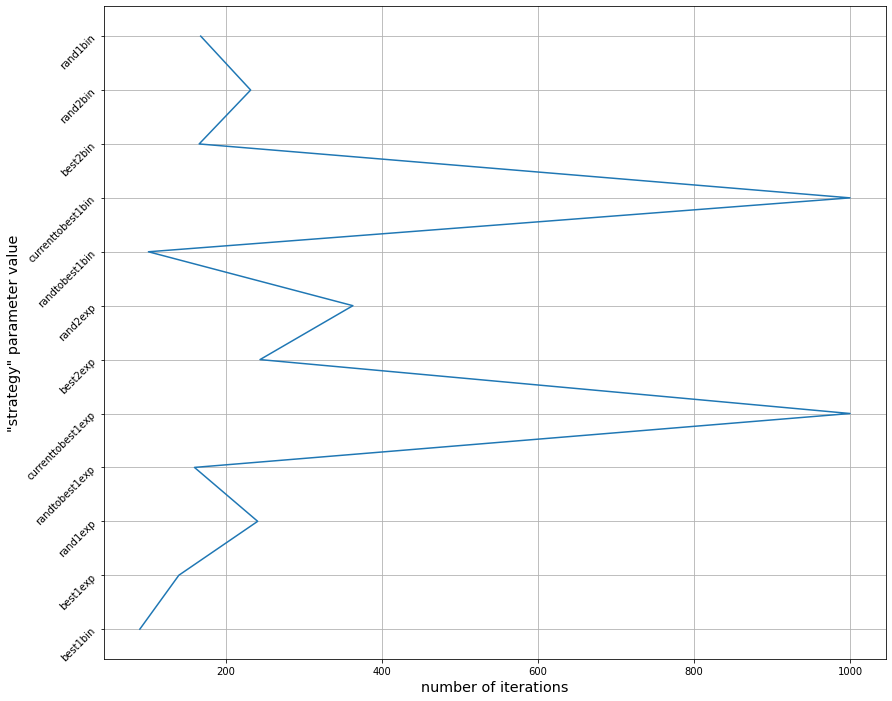

In [10]:
plot_n_iters(param_grid, 'strategy', iters, string_values=True)

Больше всего итераций (примерно в 5 раз больше, чем при любой другой стратегии) достигается при стратегиях currenttobest. Также стратегии 1 в среднем справляются лучше, чем стратегии 2, стратегии best в среднем справляются лучше, чем стратегии randtobest, а стратегии randtobest – лучше, чем стратегии rand.

## Параметр popsize

In [11]:
value, score, iters = find_n_iters(ackley, bounds, param_grid, 'popsize')

In [12]:
print(f'Минимальное кол-во итераций ({score}) достигается при popsize={value}')

Минимальное кол-во итераций (7) достигается при popsize=1


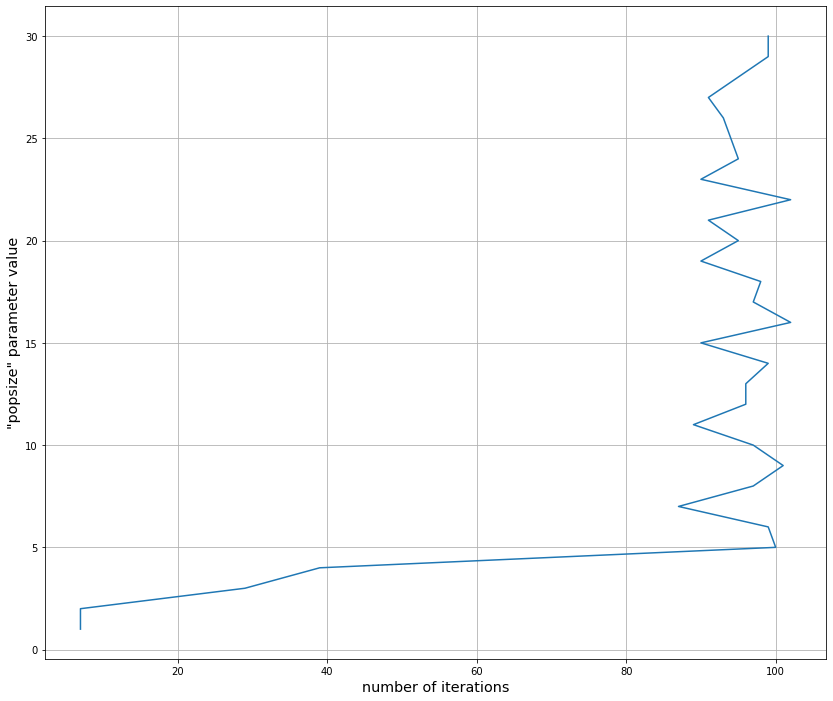

In [13]:
plot_n_iters(param_grid, 'popsize', iters)

Количество итераций наименьшее при popsize=1 или popsize=2 и резко возрастает (с 7 до 100!) при увеличении значения popsize с 2 до 5. При дальнейшем увеличении значения popsize до 30 количество итераций колеблется в диапазоне 85-100.

## Параметр tol

In [14]:
value, score, iters = find_n_iters(ackley, bounds, param_grid, 'tol')

In [15]:
print(f'Минимальное кол-во итераций ({score}) достигается при tol={value}')

Минимальное кол-во итераций (90) достигается при tol=0.1


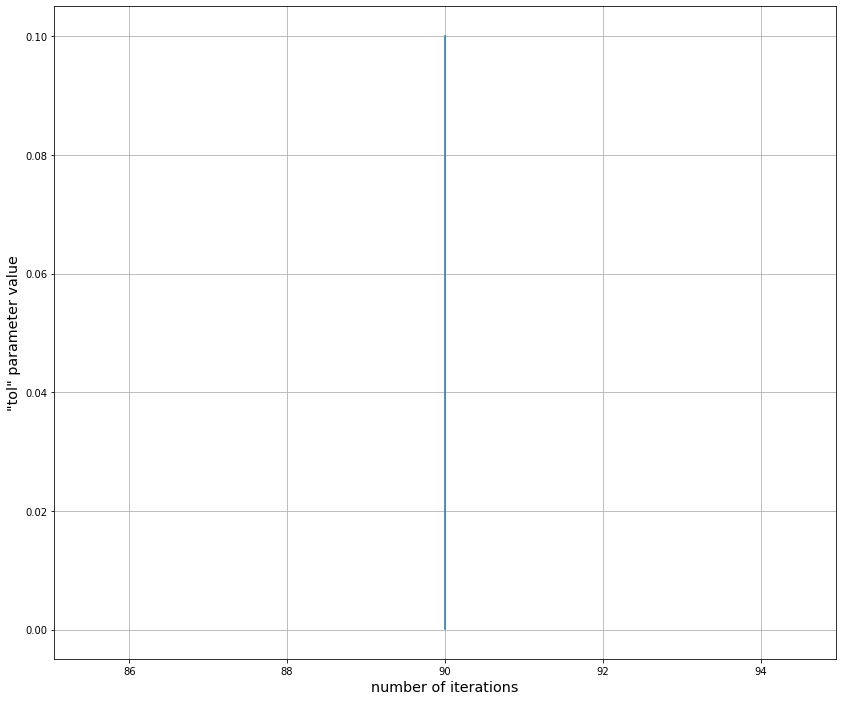

In [16]:
plot_n_iters(param_grid, 'tol', iters)

Либо я неправильно подобрала значения параметра tol, либо он на количество итераций вообще не влияет.

## Параметр mutation

In [17]:
value, score, iters = find_n_iters(ackley, bounds, param_grid, 'mutation')

In [18]:
print(f'Минимальное кол-во итераций ({score}) достигается при mutation={value}')

Минимальное кол-во итераций (5) достигается при mutation=0.1


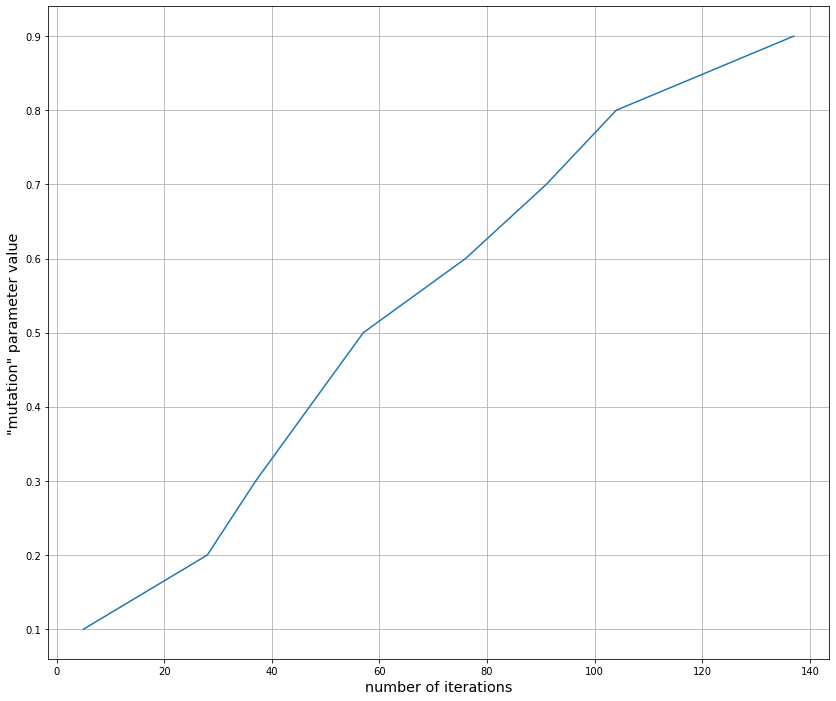

In [19]:
plot_n_iters(param_grid, 'mutation', iters)

Чем больше значение mutation, тем больше количество итераций.

## Параметр recombination

In [20]:
value, score, iters = find_n_iters(ackley, bounds, param_grid, 'recombination')

In [21]:
print(f'Минимальное кол-во итераций ({score}) достигается при recombination={value}')

Минимальное кол-во итераций (84) достигается при recombination=0.8


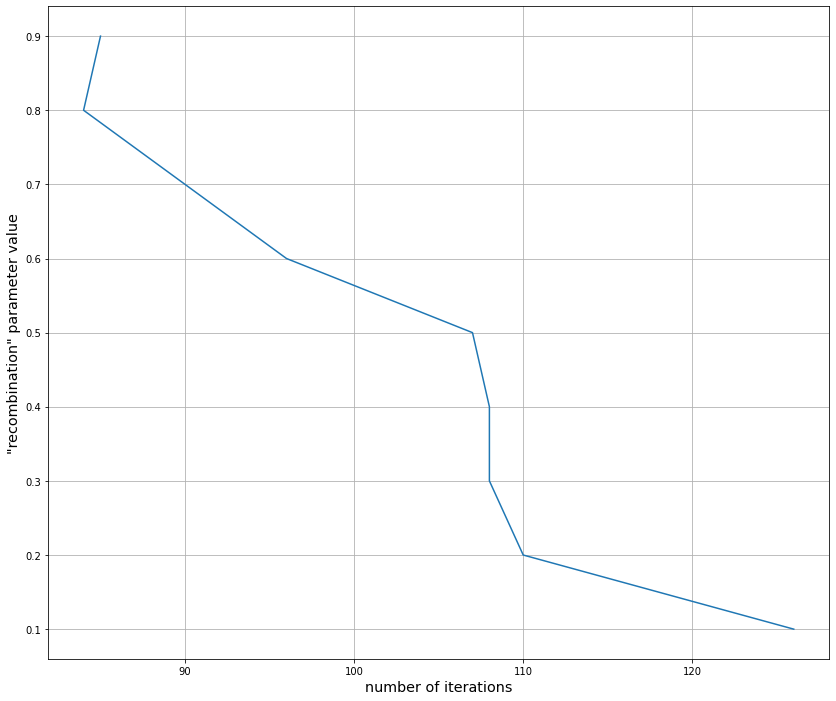

In [22]:
plot_n_iters(param_grid, 'recombination', iters)

С увеличением значения recombination с 0.1 до 0.8 уменьшается (но неравномерно) количество итераций. При recombination=0.9 количество итераций чуть-чуть больше, чем при recombination=0.8.

## Параметр updating
Здесь всего 2 значения, поэтому использовать функцию `find_n_iters` или строить график нет смысла.

In [23]:
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [24]:
result = differential_evolution(ackley, bounds, seed=42, updating='deferred')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3753
     nit: 122
 success: True
       x: array([0., 0.])

При updating='deferred' количество итераций почти в полтора раза больше, чем при updating='immediate' (122 против 90).

# Дополнительное задание
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.<br>
<br>
Воспользуемся методом поиска по решётке. Чтобы grid search выполнялся какое-то разумное время (в предыдущей решётке 233280 комбинаций параметров – Colab даже на GPU будет считать это несколько часов. Как-то чересчур.), уменьшим размеры решётки:

1.   Уберём из значений strategy половину стратегий, давших в предыдущем задании наибольшее количество итераций – это 'rand1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'currenttobest1bin' и 'rand2bin'. Соответственно, оставшиеся у нас 6 наилучших стратегий – это 'best1bin', 'best1exp', 'randtobest1exp', 'randtobest1bin', 'best2bin' и 'rand1bin'.
2.   Диапазон значений popsize сократим до 1-5, т. к., на графике из предыдущего задания видно, что дальнейшее увеличение значения popsize (с 5 до 30) не влияет заметно на количество итераций.
3.   Уберём параметр tol, т. к., в предыдущем задании он на количество итераций вообще не влиял.

233280 комбинаций параметров превратились в 4860! Это уже лучше.

In [25]:
# вместо параметра updating будем использовать параметр workers, т. к.:
# 1) updating='immediate' и workers=1 – дефолтные значения
# 2) согласно документации scipy, только значение updating='deferred' совместимо
# с распараллеливанием, причём выставленное значение workers != 1
# автоматически выставляет updating='deferred'
# Т. е.:
# workers=1 -> updating='immediate'
# workers=-1 -> updating='deferred'

param_grid = {'strategy': ['best1bin', 'best1exp', 'randtobest1exp',
                           'randtobest1bin', 'best2bin', 'rand1bin'],
              'popsize': np.arange(1, 6),
              'mutation': np.arange(0.1, 1.0, 0.1),
              'recombination': np.arange(0.1, 1.0, 0.1),
              'workers': [1, -1]}

Напишем функцию для поиска по решётке, возвращающую словарь наилучших параметров и минимальное количество итераций, которое достигается при этих параметрах.

In [26]:
def grid_search(func, bounds, param_grid):
    best_params = None
    best_score = 1000000
    combinations = list(
        product(*(param_grid[key] for key in param_grid.keys()))
        )
    for combo in tqdm(combinations):
        params = dict(zip(param_grid.keys(), combo))
        arg_dict = {'func': func, 'bounds': bounds, 'seed': 42}
        arg_dict.update(params)
        result = differential_evolution(**arg_dict)
        if result['nit'] < best_score:
            best_params = params
            best_score = result['nit']
    return best_params, best_score

In [27]:
best_params, best_score = grid_search(ackley, bounds, param_grid)

In [28]:
best_params

{'mutation': 0.1,
 'popsize': 1,
 'recombination': 0.9,
 'strategy': 'best1bin',
 'workers': 1}

In [29]:
best_score

3

Множество параметров, при котором достигается минимальное количество итераций:

*   **strategy**='best1bin'
*   **popsize**=1
*   **tol**=0.01 (дефолтное значение)
*   **mutation**=0.1
*   **recombination**=0.9
*   **updating**='immediate'

Всё соответствует результатам, полученным в предыдущем задании при оптимизации каждого параметра по отдельности.<br>
Минимальное количество итераций: 3.<br>
<br>
Проверяем.

In [30]:
result = differential_evolution(ackley, bounds, popsize=1, mutation=0.1,
                                recombination=0.9, seed=42)
result

     fun: 5.38186418753828
     jac: array([-7.03437308e-05,  1.20792265e-05])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 3
 success: True
       x: array([-0.98241736, -1.96461645])

Всё сошлось!